## EDA de los datasets limpios y elección de las variables para el modelo de recomendación

### En esta Jupyter Notebook se realiza el Análisis Exploratorio de los datos de los tres conjuntos de datos ya limpios para finalmente elegir las variables que serán usadas para entrenar el modelo de recomendación solicitado. Esto se hace dado que es un gran volumen de información y los recursos de procesamiento y almacenamiento, sobretodo al momento de deployar el proyecto, son limitados.

In [21]:
#Importaciones necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import utils

### EDA del dataset  user_reviews

En esta sección se desarrolla el Análisis Exploratorio de los Datos del conjunto steam_games que ya pasó por el proceso de ETL. Tomé la decisión de quedarme con 9 columnas que considero relevantes: 'genres','price','early_access','id','release_year','publisher','app_name','title','developer

### Lectura del conjunto de datos

Leo los datos del parquet y se guarda en un dataframe.

In [3]:
steam_games = pd.read_parquet('/Users/gaston/Documents/Proy.-Data-Analyst-1/JupyterNotebooks/steam_games.parquet')

In [4]:
steam_games

,genres,price,early_access,id,release_year,publisher,app_name,title,developer
88310,"[Action, Casual, Indie, Simulation, Strategy]",4.99,0.0,761140.0,2018,Kotoshiro,Lost Summoner Kitty,Lost Summoner Kitty,Kotoshiro
88311,"[Free to Play, Indie, RPG, Strategy]",0.00,0.0,643980.0,2018,"Making Fun, Inc.",Ironbound,Ironbound,Secret Level SRL
88312,"[Casual, Free to Play, Indie, Simulation, Sports]",0.00,0.0,670290.0,2017,Poolians.com,Real Pool 3D - Poolians,Real Pool 3D - Poolians,Poolians.com
88313,"[Action, Adventure, Casual]",0.99,0.0,767400.0,2017,彼岸领域,弹炸人2222,弹炸人2222,彼岸领域
88314,None,2.99,0.0,773570.0,None,None,Log Challenge,None,None
...,...,...,...,...,...,...,...,...,...
120440,"[Casual, Indie, Simulation, Strategy]",1.99,0.0,773640.0,2018,Ghost_RUS Games,Colony On Mars,Colony On Mars,"Nikita ""Ghost_RUS"""
120441,"[Casual, Indie, Strategy]",4.99,0.0,733530.0,2018,Sacada,LOGistICAL: South Africa,LOGistICAL: South Africa,Sacada
120442,"[Indie, Racing, Simulation]",1.99,0.0,610660.0,2018,Laush Studio,Russian Roads,Russian Roads,Laush Dmitriy Sergeevich
120443,"[Casual, Indie]",4.99,0.0,658870.0,2017,SIXNAILS,EXIT 2 - Directions,EXIT 2 - Directions,"xropi,stev3ns"


In [5]:
# Reviso la info del DF para verificar la cantidad de registros y la existencia de nulos
steam_games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32135 entries, 88310 to 120444
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   genres        28852 non-null  object 
 1   price         30758 non-null  float64
 2   early_access  32135 non-null  float64
 3   id            32133 non-null  float64
 4   release_year  29783 non-null  object 
 5   publisher     24083 non-null  object 
 6   app_name      32133 non-null  object 
 7   title         30085 non-null  object 
 8   developer     28836 non-null  object 
dtypes: float64(3), object(6)
memory usage: 2.5+ MB


In [6]:
#Genero una función para verificar la info y calcular el % de nulos
# Calculo el número total de filas en el DataFrame
total_filas = len(steam_games)

# Creo una lista para almacenar los DataFrames temporales
info_data = []

# Itero a través de las columnas del DataFrame
for col in steam_games.columns:
    # Nombre de la columna
    nombre_campo = col

    # Tipo de datos de la columna
    tipo_datos = steam_games[col].dtype

    # Número de valores no nulos en la columna
    no_nulos = steam_games[col].count()

    # Número de valores nulos en la columna
    nulos = total_filas - no_nulos

    # Porcentaje de valores no nulos en la columna
    porcentaje_no_nulos = (no_nulos / total_filas) * 100

    # Porcentaje de valores nulos en la columna
    porcentaje_nulos = (nulos / total_filas) * 100

    # Creo un DataFrame temporal para esta columna
    temp_df = pd.DataFrame({"nombre_campo": [nombre_campo], "tipo_datos": [tipo_datos],
                            "no_nulos_%": [porcentaje_no_nulos], "nulos_%": [porcentaje_nulos],
                            "nulos": [nulos]})

    # Agregao el DataFrame temporal a la lista
    info_data.append(temp_df)

# Concateno todos los DataFrames temporales en uno solo
info_df = pd.concat(info_data, ignore_index=True)

# Muestro el DataFrame con la información deseada
print(info_df)




   nombre_campo tipo_datos  no_nulos_%    nulos_%  nulos
0        genres     object   89.783725  10.216275   3283
1         price    float64   95.714953   4.285047   1377
2  early_access    float64  100.000000   0.000000      0
3            id    float64   99.993776   0.006224      2
4  release_year     object   92.680878   7.319122   2352
5     publisher     object   74.943208  25.056792   8052
6      app_name     object   99.993776   0.006224      2
7         title     object   93.620663   6.379337   2050
8     developer     object   89.733935  10.266065   3299


Este conjunto de datos tiene 9 columnas y 32135 registros. Para recordar, contiene la información relacionada a cada juego como el precio, el año de lanzamiento, el nombre de la aplicación y del juego, el desarrollador y el publicitador, así como el género.

### Columnas 'id', 'app_name' y 'title'

Estas columnas hacen referencia al identificador único del juego y los nombres de la aplicación y del título del juego. Estos últimos no tienen mayor información que analizar en este momento. Con el 'id' podemos calcular la cantidad de juegos.

In [7]:
total_juegos = len(steam_games['id'].unique())
print(f"El total de juegos que hay registrados son: {total_juegos}")

El total de juegos que hay registrados son: 32133


### Columna 'genres'

In [8]:
# Uso explode para descomponer las listas en filas individuales
steam_games = steam_games.explode('genres')

# Convierto la columna 'genres' en tipo 'category'
steam_games['genres'] = steam_games['genres'].astype('category')

Utilizo las librerías "Seaborn" junto con "Matplotlib" para crear un gráfico de barras horizontal que muestra la cantidad de juegos de Steam en diferentes géneros.



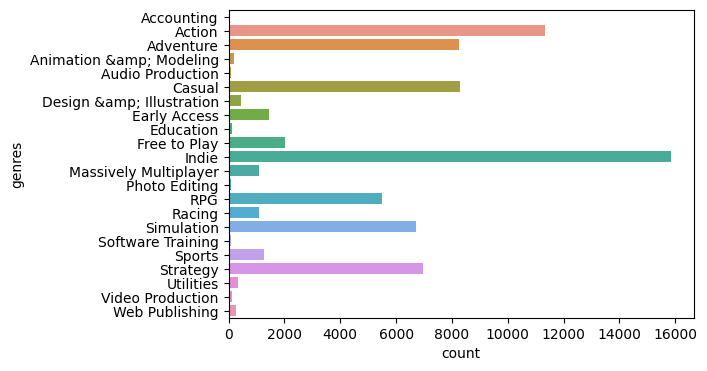

In [9]:
plt.figure(figsize=(6, 4))
sns.countplot(data=steam_games, y='genres', orient='h')
plt.show()

Genero una tabla para mostrar el total por género y el porcentaje que corresponde a cada uno

In [10]:
def generar_tabla_generos(steam_games):
    # Cuento la cantidad de juegos por género
    genero_counts = steam_games['genres'].value_counts().reset_index()
    genero_counts.columns = ['Genero', 'Total']

    # Calcular el porcentaje con respecto al total
    genero_counts['Porcentaje'] = round((genero_counts['Total'] / genero_counts['Total'].sum()) * 100)

    return genero_counts

# Llamar a la función y obtener la tabla
tabla_generos = generar_tabla_generos(steam_games)

# Mostrar la tabla
print(tabla_generos)

                       Genero  Total  Porcentaje
0                       Indie  15858        22.0
1                      Action  11321        16.0
2                      Casual   8282        12.0
3                   Adventure   8243        12.0
4                    Strategy   6957        10.0
5                  Simulation   6699         9.0
6                         RPG   5479         8.0
7                Free to Play   2031         3.0
8                Early Access   1462         2.0
9                      Sports   1257         2.0
10      Massively Multiplayer   1108         2.0
11                     Racing   1083         2.0
12  Design &amp; Illustration    460         1.0
13                  Utilities    340         0.0
14             Web Publishing    268         0.0
15   Animation &amp; Modeling    183         0.0
16                  Education    125         0.0
17           Video Production    116         0.0
18          Software Training    105         0.0
19           Audio P

Los juegos estan categorizados mayormente en las categorías Indie, Action, Casual y Adventure.

### Columna 'release_year'

In [11]:
def generar_tabla_por_anio(steam_games):
    # Contar la cantidad de juegos por año de lanzamiento
    anio_counts = steam_games['release_year'].value_counts().reset_index()
    anio_counts.columns = ['Año', 'Total']

    # Calcular el porcentaje con respecto al total
    total_general = anio_counts['Total'].sum()
    anio_counts['Porcentaje'] = anio_counts['Total'].apply(lambda x: f'{(x / total_general * 100):.2f}%')

    return anio_counts

# Llamar a la función y obtener la tabla
tabla_por_anio = generar_tabla_por_anio(steam_games)

# Mostrar la tabla
print(tabla_por_anio)



     Año  Total Porcentaje
0   2017  25278     35.14%
1   2016  17909     24.90%
2   2015  12407     17.25%
3   2014   6445      8.96%
4   2013   3090      4.30%
5   2012   2162      3.01%
6   2011   1034      1.44%
7   2010    696      0.97%
8   2009    507      0.70%
9   2008    351      0.49%
10  2018    316      0.44%
11  2007    277      0.39%
12  2006    230      0.32%
13  2005    149      0.21%
14  2003    128      0.18%
15  2001    119      0.17%
16  2004    107      0.15%
17  1999     87      0.12%
18  1998     86      0.12%
19  2002     70      0.10%
20  1997     67      0.09%
21  1996     60      0.08%
22  2000     60      0.08%
23  1994     56      0.08%
24  1995     51      0.07%
25  1993     49      0.07%
26  1992     26      0.04%
27  1991     26      0.04%
28  1990     16      0.02%
29  1989     14      0.02%
30  1988     11      0.02%
31  1987     10      0.01%
32  2019     10      0.01%
33  1984      7      0.01%
34  1983      6      0.01%
35  1986      5      0.01%
3

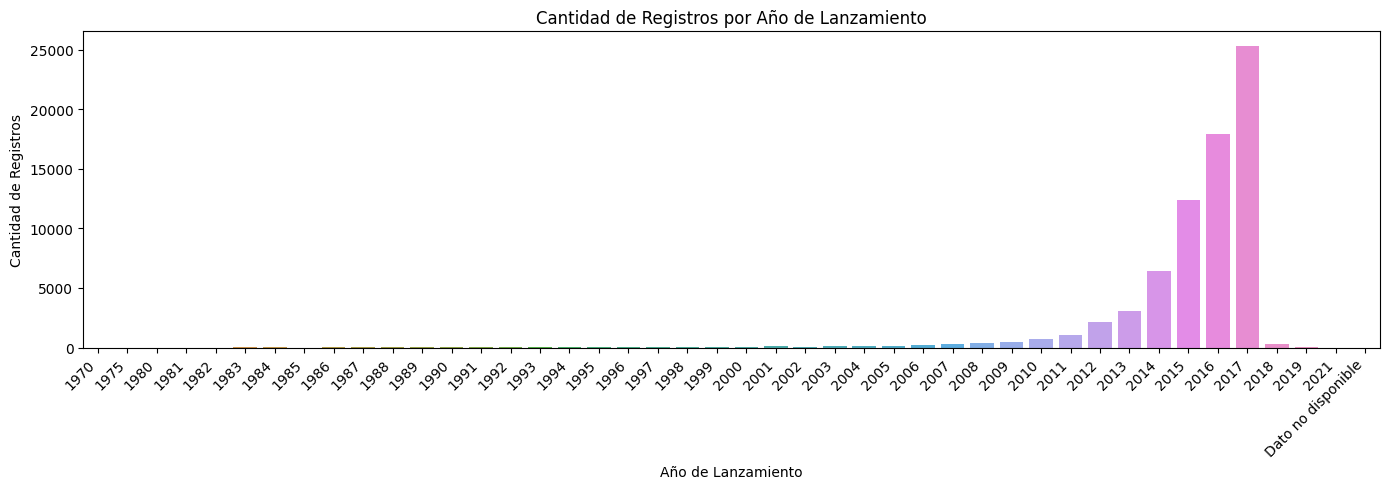

In [12]:
# Cuenta la frecuencia de cada año
conteo_anios = steam_games['release_year'].value_counts()

# Ordena los valores para que 'Datos no disponibles' queden al principio o al final
conteo_anios = conteo_anios.reindex(['Dato no disponible'] + list(conteo_anios.index))
# Ordena los valores por año
conteo_anios = conteo_anios.sort_index()

# Crear la gráfica de barras
plt.figure(figsize=(14, 5))
sns.barplot(x=conteo_anios.index, y=conteo_anios.values)
plt.xlabel('Año de Lanzamiento') ; plt.ylabel('Cantidad de Registros') ; plt.title('Cantidad de Registros por Año de Lanzamiento')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Como la plataforma se lanzó el 12 de septiembre de 2003, filtro todos los registros anteriores a 2003 teniendo en cuenta
que existen la no relevancia de la información anterior a esa fecha

In [24]:
# Reemplazar los valores None con NaN
steam_games['release_year'].replace('None', np.nan, inplace=True)

# Convertir la columna 'release_year' a tipo float para que acepte NaN
steam_games['release_year'] = steam_games['release_year'].astype(int)

# Filtrar los registros cuyo año sea mayor o igual a 2003
steam_games = steam_games[steam_games['release_year'] >= 2003]


/var/folders/_x/y99l7l9s60q1726y6701xbkw0000gn/T/ipykernel_18383/3017515443.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  steam_games['release_year'].replace('None', np.nan, inplace=True)
/var/folders/_x/y99l7l9s60q1726y6701xbkw0000gn/T/ipykernel_18383/3017515443.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  steam_games['release_year'] = steam_games['release_year'].astype(int)


In [36]:
steam_games

,genres,price,early_access,id,release_year,publisher,app_name,title,developer
88310,Action,4.99,0.0,761140.0,2018,Kotoshiro,Lost Summoner Kitty,Lost Summoner Kitty,Kotoshiro
88310,Casual,4.99,0.0,761140.0,2018,Kotoshiro,Lost Summoner Kitty,Lost Summoner Kitty,Kotoshiro
88310,Indie,4.99,0.0,761140.0,2018,Kotoshiro,Lost Summoner Kitty,Lost Summoner Kitty,Kotoshiro
88310,Simulation,4.99,0.0,761140.0,2018,Kotoshiro,Lost Summoner Kitty,Lost Summoner Kitty,Kotoshiro
88310,Strategy,4.99,0.0,761140.0,2018,Kotoshiro,Lost Summoner Kitty,Lost Summoner Kitty,Kotoshiro
...,...,...,...,...,...,...,...,...,...
120442,Indie,1.99,0.0,610660.0,2018,Laush Studio,Russian Roads,Russian Roads,Laush Dmitriy Sergeevich
120442,Racing,1.99,0.0,610660.0,2018,Laush Studio,Russian Roads,Russian Roads,Laush Dmitriy Sergeevich
120442,Simulation,1.99,0.0,610660.0,2018,Laush Studio,Russian Roads,Russian Roads,Laush Dmitriy Sergeevich
120443,Casual,4.99,0.0,658870.0,2017,SIXNAILS,EXIT 2 - Directions,EXIT 2 - Directions,"xropi,stev3ns"


### Columnas 'publisher' y 'developer'

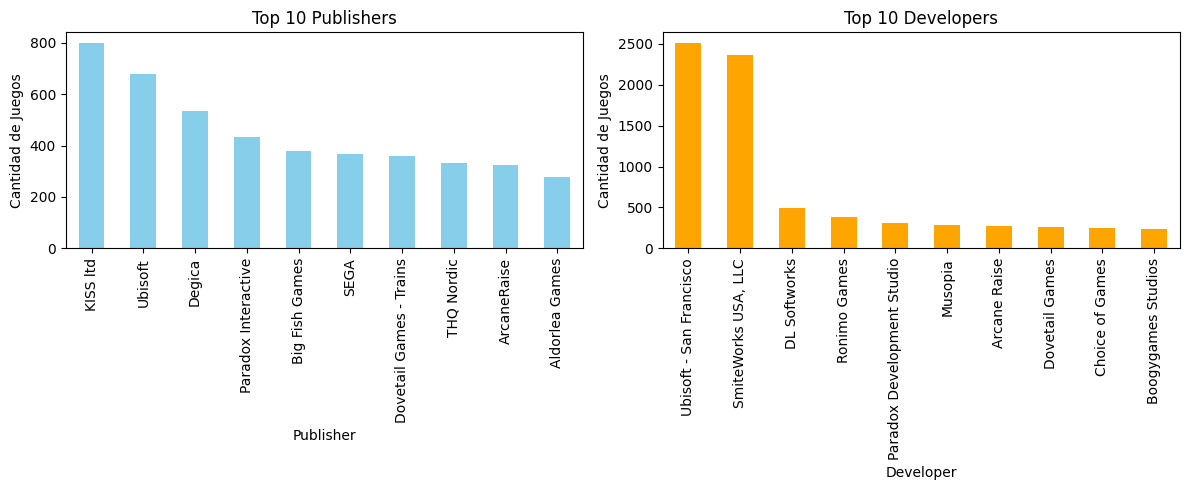

In [26]:
# Contar la cantidad de juegos por publisher
conteo_publisher = steam_games['publisher'].value_counts()

# Contar la cantidad de juegos por developer
conteo_developer = steam_games['developer'].value_counts()

# Crear una figura con dos subplots uno al lado del otro
plt.figure(figsize=(12, 5))

# Primer subplot para los publishers
plt.subplot(1, 2, 1)
conteo_publisher[:10].plot(kind='bar', color='skyblue')
plt.xlabel('Publisher') ; plt.ylabel('Cantidad de Juegos') ; plt.title('Top 10 Publishers')

# Segundo subplot para los developers
plt.subplot(1, 2, 2)
conteo_developer[:10].plot(kind='bar', color='orange')
plt.xlabel('Developer') ; plt.ylabel('Cantidad de Juegos') ; plt.title('Top 10 Developers')

# Muestra y ajustar el espaciado entre subplots
plt.tight_layout()
plt.show()

En el caso de los publishers de juegos, la mayor cantidad de juegos la realizaron "kiss ltd", "Ubisoft" y "Degica" y en el caso de los desarrolladores, también "Ubisoft" y "SmiteWorks" son los desarrolladores que mas juegos han desarrollado para la plataforma.

### Columna 'price'

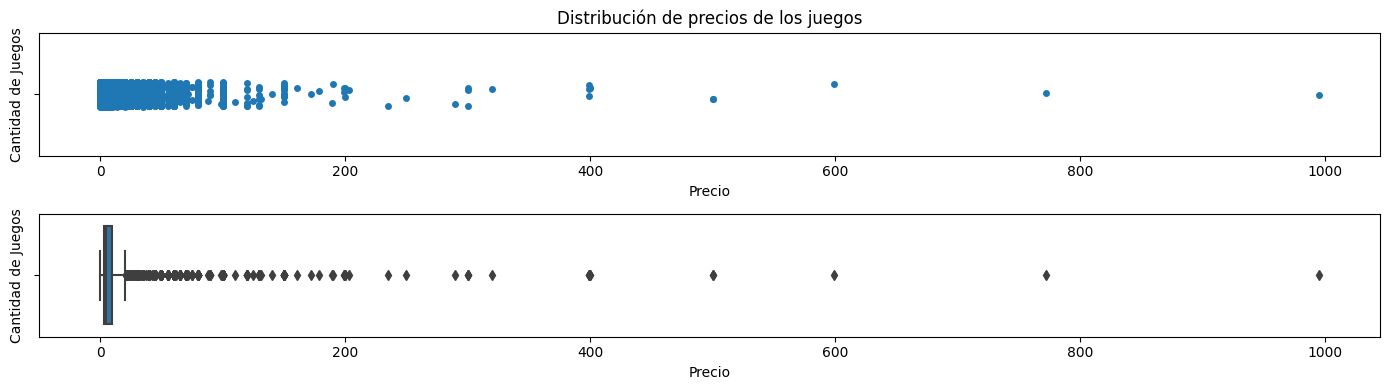

In [27]:
# Obtiene los precios para cada juego y hace un dataframe
precio_unicos = steam_games.groupby('id')['price'].unique().reset_index().explode('price')
df_precio_unicos = precio_unicos['price']

fig = plt.figure(figsize=(14, 4))

ax1 = fig.add_subplot(211)
sns.stripplot(data=df_precio_unicos, x=df_precio_unicos, ax=ax1)
ax1.set_xlabel('Precio') ; ax1.set_ylabel('Cantidad de Juegos') ; ax1.set_title('Distribución de precios de los juegos')

ax2 = fig.add_subplot(212, sharex=ax1)
sns.boxplot(data=df_precio_unicos, x=df_precio_unicos, ax=ax2)
ax2.set_xlabel('Precio') ; ax2.set_ylabel('Cantidad de Juegos')

# Muestra y ajustar el espaciado entre subplots
plt.tight_layout()
plt.show()

In [29]:
estadisticas = df_precio_unicos.astype(float).describe()
print(f'El precio medio (mediana) de los juegos es de: {estadisticas[5]}')
print(f'El precio promedio (mean) de los juegos es de: {round(estadisticas[1],2)}')
print(f'El 75% de los juegos tienen un precio menor de: {estadisticas[6]}')

El precio medio (mediana) de los juegos es de: 4.99
El precio promedio (mean) de los juegos es de: 8.89
El 75% de los juegos tienen un precio menor de: 9.99


In [31]:
# Calcular estadísticas
estadisticas = df_precio_unicos.astype(float).describe()

# Calcular el rango intercuartílico (IQR)
Q1 = estadisticas['25%']
Q3 = estadisticas['75%']
IQR = Q3 - Q1

# Calcular límites para valores atípicos
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Contar valores atípicos
valores_atipicos = df_precio_unicos[(df_precio_unicos < limite_inferior) | (df_precio_unicos > limite_superior)]
conteo_atipicos = len(valores_atipicos)

# Imprimir las estadísticas y el conteo de valores atípicos
print(f'El precio medio (mediana) de los juegos es de: {estadisticas["50%"]}')
print(f'El precio promedio (mean) de los juegos es de: {round(estadisticas["mean"], 2)}')
print(f'El 75% de los juegos tienen un precio menor de: {estadisticas["75%"]}')
print(f'El número de valores atípicos (ouliers) es: {conteo_atipicos}')


El precio medio (mediana) de los juegos es de: 4.99
El precio promedio (mean) de los juegos es de: 8.89
El 75% de los juegos tienen un precio menor de: 9.99
El número de valores atípicos (ouliers) es: 1758


Se puede ver que casi el 50% de los juegos tienen precios entre 0 y los 4.99 dolares y el 75% de los juegos tienen precios inferior a los 9.99 dolares. Se Observan 1758 valores que se pueden considerar atípicos.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1257: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1264: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1272: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1273: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


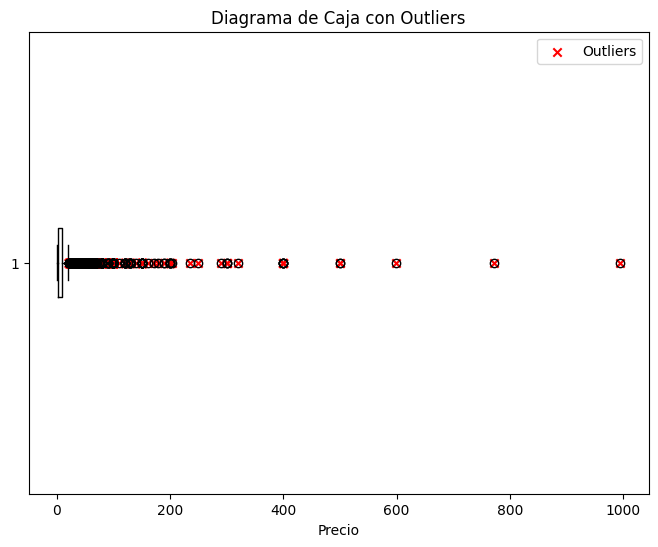

Porcentaje de outliers: 6.01%


In [33]:
# Identificar los outliers
outliers = df_precio_unicos[(df_precio_unicos < limite_inferior) | (df_precio_unicos > limite_superior)]

# Calcular el porcentaje de outliers
porcentaje_outliers = (len(outliers) / len(df_precio_unicos)) * 100

# Crear un gráfico para visualizar los outliers
plt.figure(figsize=(8, 6))
plt.boxplot(df_precio_unicos, vert=False)
plt.scatter(outliers, [1] * len(outliers), color='red', marker='x', label='Outliers')
plt.title('Diagrama de Caja con Outliers')
plt.xlabel('Precio')
plt.legend()
plt.show()

# Imprimir el porcentaje de outliers
print(f'Porcentaje de outliers: {porcentaje_outliers:.2f}%')

luego de graficar y verificar que el % de los atípicos (ouliers) es de un 6%, decido borrarlos en el dataframe "steam_games"

In [41]:
# Calcular el rango intercuartílico (IQR)
Q1 = steam_games['price'].quantile(0.25)
Q3 = steam_games['price'].quantile(0.75)
IQR = Q3 - Q1

# Calcular los límites para outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Eliminar los outliers del DataFrame original
steam_games_sin_outliers = steam_games[~((steam_games['price'] < limite_inferior) | (steam_games['price'] > limite_superior))]

# Imprimir el DataFrame sin outliers
print("DataFrame sin outliers:")
print(steam_games_sin_outliers)


DataFrame sin outliers:
            genres  price  early_access        id  release_year     publisher   
88310       Action   4.99           0.0  761140.0          2018     Kotoshiro  \
88310       Casual   4.99           0.0  761140.0          2018     Kotoshiro   
88310        Indie   4.99           0.0  761140.0          2018     Kotoshiro   
88310   Simulation   4.99           0.0  761140.0          2018     Kotoshiro   
88310     Strategy   4.99           0.0  761140.0          2018     Kotoshiro   
...            ...    ...           ...       ...           ...           ...   
120442       Indie   1.99           0.0  610660.0          2018  Laush Studio   
120442      Racing   1.99           0.0  610660.0          2018  Laush Studio   
120442  Simulation   1.99           0.0  610660.0          2018  Laush Studio   
120443      Casual   4.99           0.0  658870.0          2017      SIXNAILS   
120443       Indie   4.99           0.0  658870.0          2017      SIXNAILS   

   

In [ ]:
steam_games_sin_outliers.to_parquet('steam_games_EDA.parquet', engine='pyarrow', compression='snappy')